<a href="https://colab.research.google.com/github/sensei-jirving/Online-DS-PT-01.24.22-cohort-notes/blob/main/Week_03/Lecture_02/CodeAlong/Post_Class_01_24_22_Multivariate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate Analysis & Visualizations

Load the [cleaned medical data](https://drive.google.com/file/d/15QvGnjlYvVd8bxl-Fl_EPVgmfvgATGZB/view?usp=sharing) using the url in the cell below:

In [4]:
## excel file url
url ="https://docs.google.com/spreadsheets/d/e/2PACX-1vRUYiMWJ3WI6lrrG8rdRFy49aaKSqtlZhbqHodoJfQeDnWj1bgvdSCVM0tnlTkExjhSv7f0LSfIiTVU/pub?output=xlsx"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel(url)
df

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,Base_charge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53.0,86575.93,Divorced,Male,0.0,19.141466,6.0,0.0,0.0,0.0,Emergency Admission,1.0,0.0,Medium,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51.0,46805.99,Married,Female,0.0,18.940352,4.0,2.0,1.0,0.0,Emergency Admission,1.0,0.0,High,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53.0,14370.14,Widowed,Female,0.0,18.057507,4.0,1.0,0.0,0.0,Elective Admission,1.0,0.0,Medium,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78.0,39741.49,Married,Male,0.0,16.576858,4.0,1.0,0.0,0.0,Elective Admission,0.0,1.0,Medium,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Blood Work,1.714879,2127.830423,12993.437350
4,OK,35.67302,-95.19180,Urban,3.0,76.0,81999.88,Never Married,Male,0.0,19.612646,6.0,0.0,0.0,0.0,Observation Admission,0.0,0.0,Medium,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,Blood Work,5.957250,2636.691180,12742.589910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,AL,33.87665,-88.13869,Rural,3.0,59.0,40160.19,Widowed,Male,0.0,20.227758,5.0,2.0,0.0,0.0,Emergency Admission,0.0,1.0,Medium,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,Blood Work,13.894693,3892.480540,11055.427760
959,VA,37.13892,-81.06430,Suburban,3.0,23.0,37655.11,Separated,Male,0.0,16.631573,7.0,2.0,1.0,0.0,Observation Admission,1.0,1.0,High,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,Blood Work,1.669799,2747.196682,8480.414406
960,AZ,35.04266,-110.32518,Urban,0.0,67.0,21360.91,Married,Male,0.0,17.011913,5.0,0.0,1.0,0.0,Emergency Admission,1.0,0.0,Medium,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,Intravenous,30.858920,5259.932456,22317.047440
961,NC,36.11344,-80.63370,Suburban,0.0,65.0,23473.98,Never Married,Male,0.0,16.526670,4.0,0.0,0.0,0.0,Emergency Admission,0.0,0.0,Medium,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Blood Work,7.856833,3083.731857,11225.387230


1) This is a fun place to start!  Make a scatterplot with Lng on the x axis and Lat on the y axis.

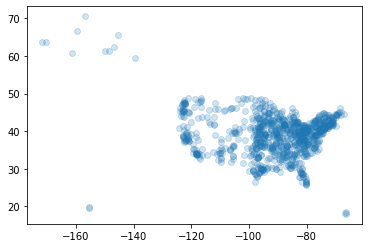

In [68]:
plt.scatter(df['Lng'],df['Lat'])#,df["State"])

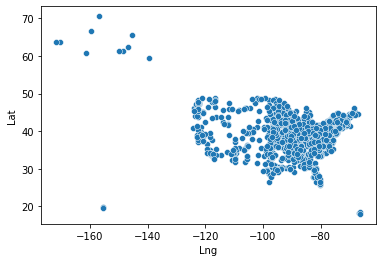

In [11]:
sns.scatterplot(data=df, y='Lat',x='Lng')

2a) Make a scatterplot that shows the Base_charge vs. Initial_days


Is there a relationship between Base_charge and Initial_days?

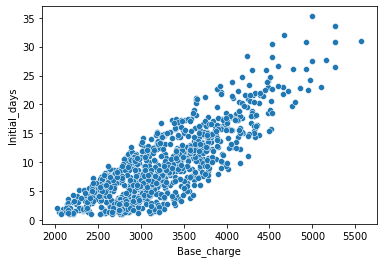

In [12]:
sns.scatterplot(data=df, y='Initial_days',x='Base_charge')

2a-Alternative) Make a [seaborn regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html) that shows the Base_charge vs. Initial_days. 
What advantage does the regplot have over the scatterplot, in terms of identifying relationships?

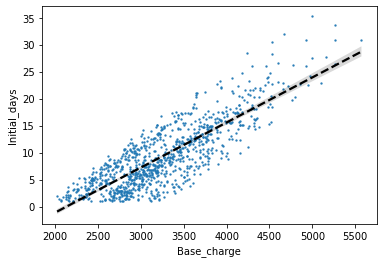

In [16]:
sns.regplot(data=df, y='Initial_days',x='Base_charge',
            scatter_kws={'s':2},
            line_kws={"color":'black','ls':'--'})

2b) Make a scatterplot that shows the Base_charge vs. Initial days that is color-coded based on the complication risk. 
What have you learned about complication risk, days and charge?

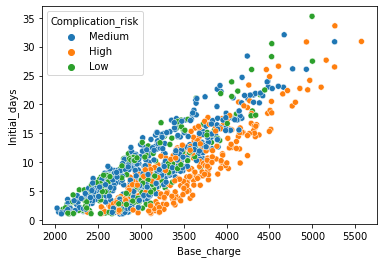

In [19]:
sns.scatterplot(data=df, y='Initial_days',x='Base_charge',hue="Complication_risk")

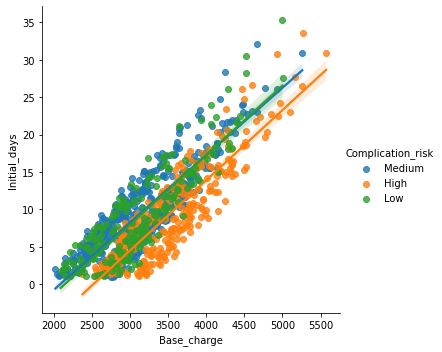

In [22]:
sns.lmplot(data=df, y='Initial_days',x='Base_charge',hue="Complication_risk");

3) Make a barchart to show the average initial days for those with each level of complication risk. (hint: use groupby to groupby the Complication Risk and find the average of the initial days.) 

In [24]:

df.head(2)

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,Base_charge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53.0,86575.93,Divorced,Male,0.0,19.141466,6.0,0.0,0.0,0.0,Emergency Admission,1.0,0.0,Medium,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,Blood Work,10.585770,3726.702860,17939.40342
1,FL,30.84513,-85.22907,Urban,3.0,51.0,46805.99,Married,Female,0.0,18.940352,4.0,2.0,1.0,0.0,Emergency Admission,1.0,0.0,High,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Intravenous,15.129562,4193.190458,17612.99812


In [28]:
avg = df.groupby("Complication_risk")['Initial_days'].mean()
avg

Complication_risk
High      9.403992
Low       8.814701
Medium    9.464482
Name: Initial_days, dtype: float64

<BarContainer object of 3 artists>

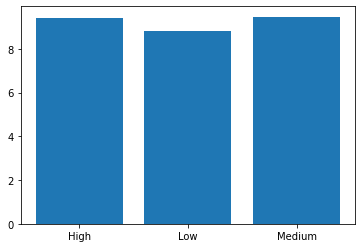

In [29]:
plt.bar(avg.index, avg.values)

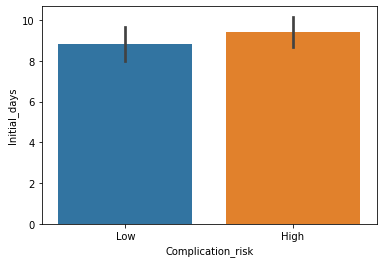

In [34]:
sns.barplot(data=df, x='Complication_risk',y='Initial_days',order=['Low','High'])

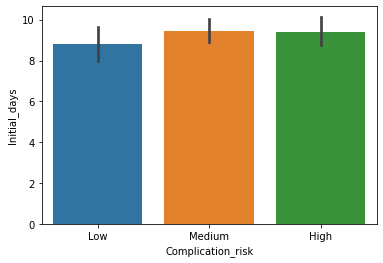

In [64]:
sns.barplot(data=df, x='Complication_risk',y='Initial_days',order=['Low','Medium','High'])

4a) Create a filter to limit the dataset to only those who have high blood pressure (1 = yes, 0 = no).  

How many people have high blood pressure? (Hint: Find the length of your filter)


In [38]:
highblood = df[df['HighBlood'] == 1]
len(highblood)

402


4b) Now create a bar chart that shows the service received for only those who have high blood pressure.  

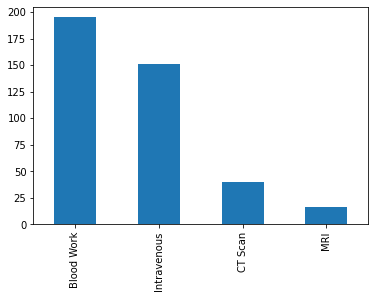

In [44]:
highblood['Services'].value_counts().plot(kind='bar')

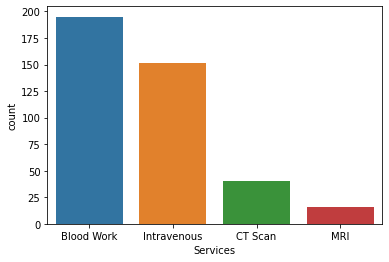

In [45]:
sns.countplot(data=highblood,x='Services')

5) Create a heatmap to show any potential correlations in this data

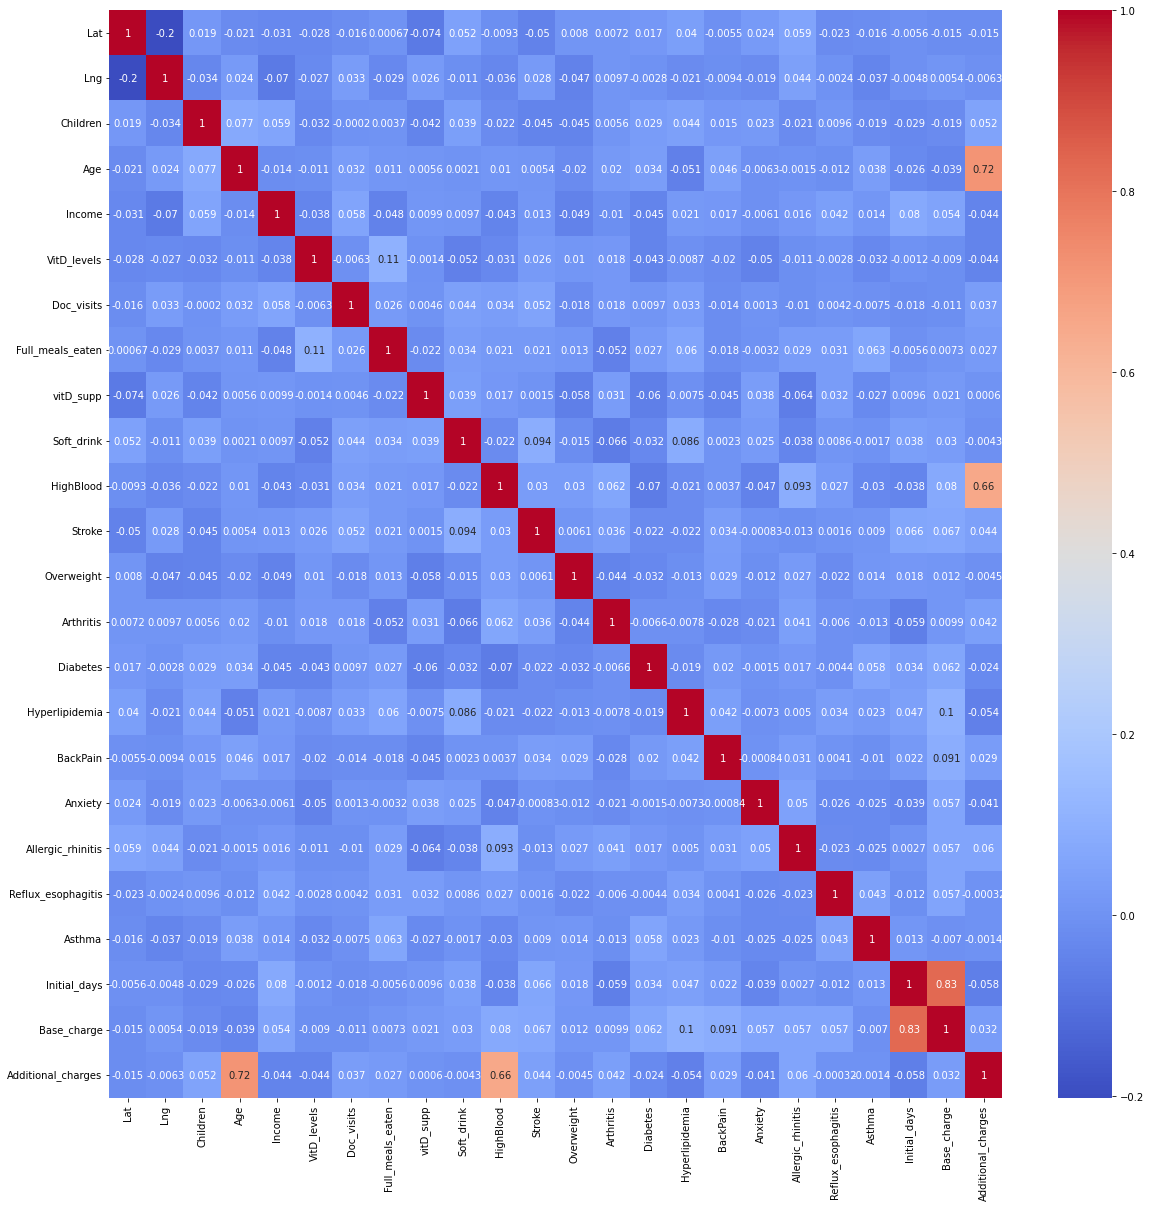

In [58]:
corr = df.drop(columns='ReAdmis').corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [55]:

df['ReAdmis'].value_counts()

0.0    963
Name: ReAdmis, dtype: int64

In [52]:
corr

,Lat,Lng,Children,Age,Income,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,Base_charge,Additional_charges
Lat,1.000000,-0.201343,0.018734,-0.021073,-0.030918,NaN,-0.028105,-0.016309,0.000671,-0.073800,0.051910,-0.009348,-0.050083,0.007994,0.007212,0.016694,0.040149,-0.005501,0.024071,0.059188,-0.022525,-0.015626,-0.005558,-0.014570,-0.015369
Lng,-0.201343,1.000000,-0.033917,0.024225,-0.069954,NaN,-0.026542,0.033234,-0.028768,0.025883,-0.010884,-0.035553,0.027513,-0.046639,0.009696,-0.002797,-0.021026,-0.009410,-0.019261,0.044165,-0.002365,-0.037253,-0.004808,0.005443,-0.006306
Children,0.018734,-0.033917,1.000000,0.076922,0.059469,NaN,-0.032177,-0.000204,0.003735,-0.042404,0.039349,-0.022406,-0.045496,-0.044590,0.005645,0.029424,0.043666,0.015364,0.022876,-0.020573,0.009552,-0.019176,-0.029288,-0.019473,0.052275
Age,-0.021073,0.024225,0.076922,1.000000,-0.013933,NaN,-0.011123,0.032233,0.010532,0.005556,0.002108,0.010161,0.005350,-0.019952,0.019557,0.034186,-0.051271,0.045562,-0.006315,-0.001540,-0.012437,0.037981,-0.025722,-0.039490,0.717254
Income,-0.030918,-0.069954,0.059469,-0.013933,1.000000,NaN,-0.038152,0.058202,-0.047993,0.009885,0.009713,-0.043077,0.012521,-0.049193,-0.010302,-0.044842,0.020566,0.016557,-0.006086,0.016264,0.041673,0.013831,0.079789,0.054007,-0.044419
ReAdmis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VitD_levels,-0.028105,-0.026542,-0.032177,-0.011123,-0.038152,NaN,1.000000,-0.006252,0.106004,-0.001362,-0.052177,-0.031499,0.025940,0.009968,0.017793,-0.042837,-0.008708,-0.020041,-0.050082,-0.011392,-0.002836,-0.032192,-0.001154,-0.009039,-0.044275
Doc_visits,-0.016309,0.033234,-0.000204,0.032233,0.058202,NaN,-0.006252,1.000000,0.026394,0.004627,0.044178,0.034248,0.052123,-0.018451,0.018120,0.009688,0.032662,-0.013917,0.001339,-0.010135,0.004246,-0.007510,-0.018004,-0.011186,0.036633
Full_meals_eaten,0.000671,-0.028768,0.003735,0.010532,-0.047993,NaN,0.106004,0.026394,1.000000,-0.021519,0.034208,0.021493,0.020751,0.013473,-0.052299,0.027340,0.059598,-0.017538,-0.003150,0.029438,0.031237,0.063148,-0.005642,0.007263,0.027222
vitD_supp,-0.073800,0.025883,-0.042404,0.005556,0.009885,NaN,-0.001362,0.004627,-0.021519,1.000000,0.039121,0.016607,0.001478,-0.057515,0.031037,-0.060152,-0.007487,-0.045106,0.037534,-0.063874,0.032230,-0.026998,0.009569,0.020731,0.000604


6) Make multivariate boxplot graph to compare the distribution of income by gender.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


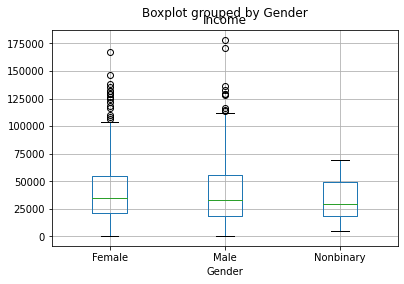

In [60]:
df.boxplot(by="Gender",column='Income');

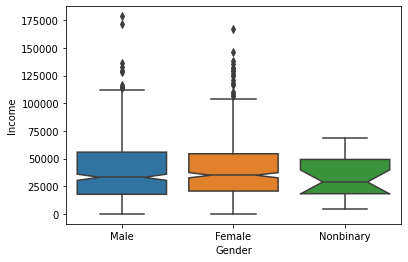

In [66]:
sns.boxplot(data=df, x='Gender',y='Income',notch=True)

If you have time, keep exploring!

# Office HOurs

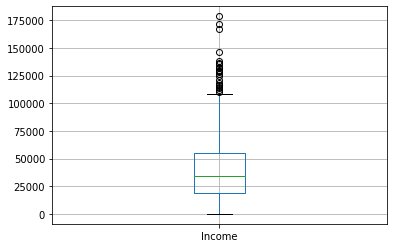

In [69]:
df.boxplot(column='Income')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


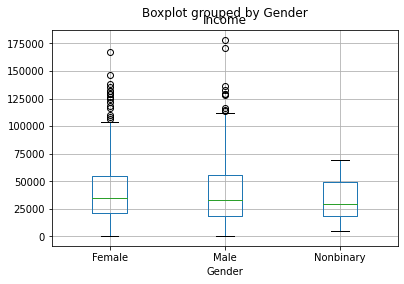

In [70]:
df.boxplot(by="Gender",column='Income');

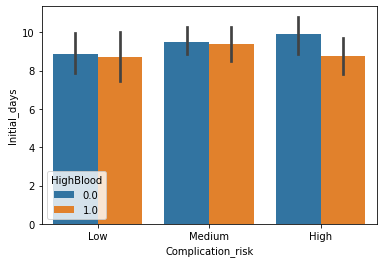

In [71]:
sns.barplot(data=df, x='Complication_risk',y='Initial_days',order=['Low','Medium','High'],hue='HighBlood')

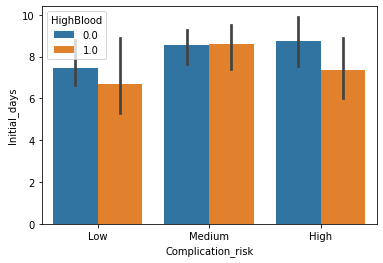

In [72]:
sns.barplot(data=df, x='Complication_risk',y='Initial_days',order=['Low','Medium','High'],hue='HighBlood',
            estimator=np.median)


In [80]:
# sns.pairplot(df[[]])

In [79]:
## suppressing warning messages
import warnings
warnings.filterwarnings('ignore')

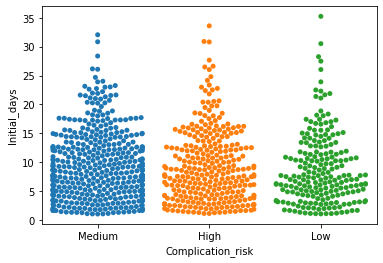

In [78]:
sns.swarmplot(data=df, x='Complication_risk',y='Initial_days');

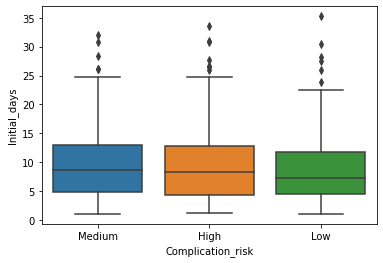

In [75]:
sns.boxplot(data=df, x='Complication_risk',y='Initial_days')

In [83]:
# ##
# !pip freeze

In [82]:
import pandas as pd
pd.__version__

'1.3.5'